In [ ]:
# Imports
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Open and convert a input
# image from BGR to GRAYSCALE
image = cv.imread(filename = '/content/drive/MyDrive/comvis/stalin.jpeg',
                   flags = cv.IMREAD_GRAYSCALE)

In [ ]:
# ORB is a feature detector and descriptor

# Initiate ORB detector
ORB = cv.ORB_create()

In [ ]:
 # Find the keypoints with ORB
keypoints = ORB.detect(image, None)

# Print number of keypoints detected
print("Number of keypoints Detected:", len(keypoints), "\n")

Number of keypoints Detected: 394 



In [ ]:
# Save Keypoints to a file

index = []

for point in keypoints:
    temp = (point.pt,
            point.size,
            point.angle,
            point.response,
            point.octave,
            point.class_id)

    index.append(temp)

# File name
filename = "/content/drive/MyDrive/comvis/output-ORB/ORB-keypoints.txt"

# Delete a file if it exists
if os.path.exists(filename):
    os.remove(filename)

# Open a file
file = open(filename, "wb")

# Write
file.write(pickle.dumps(index))

# Close a file
file.close()

In [ ]:
# Compute the descriptors with ORB
keypoints, descriptors = ORB.compute(image, keypoints)

# Print the descriptor size in bytes
print("Size of Descriptor:", ORB.descriptorSize(), "\n")

# Print the descriptor type
print("Type of Descriptor:", ORB.descriptorType(), "\n")

# Print the default norm type
print("Default Norm Type:", ORB.defaultNorm(), "\n")

# Print shape of descriptor
print("Shape of Descriptor:", descriptors.shape, "\n")

Size of Descriptor: 32 

Type of Descriptor: 0 

Default Norm Type: 6 

Shape of Descriptor: (394, 32) 



In [ ]:
# Draw only 50 keypoints on input image
image = cv.drawKeypoints(image = image,
                         keypoints = keypoints[:50],
                         outImage = None,
                         flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

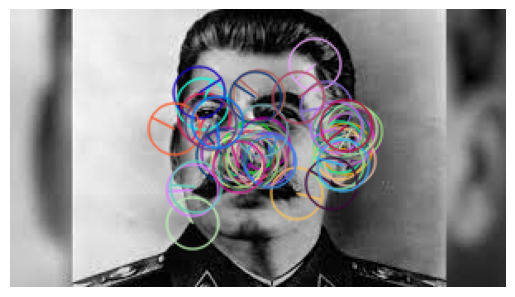

In [ ]:
# Plot input image

# Turn interactive plotting off
plt.ioff()

# Create a new figure
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

plt.imsave(fname = '/content/drive/MyDrive/comvis/output-ORB/feature-detection-ORB.png',
           arr = image,
           dpi = 300)

# Close it
plt.close()